### Importing necessary modules

In [1]:
!pip install colour-science

distutils: /opt/anaconda3/include/python3.8/UNKNOWN
sysconfig: /opt/anaconda3/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /opt/anaconda3/include/python3.8/UNKNOWN
sysconfig: /opt/anaconda3/include/python3.8
user = False
home = None
root = None
prefix = None
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
# importing required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd # for reading csv files

# for plotting chromatic diagram
import colour
from colour.plotting import *

### Displaying the image

(512, 910, 3)


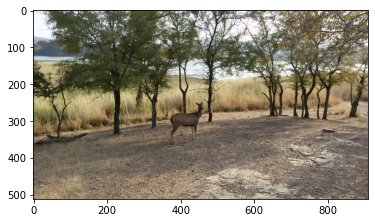

In [3]:
img_deer = img.imread('Deer.jpg')
# displaying the shape of the image
print(img_deer.shape)
# displaying the modified image
plt.imshow(img_deer)

(512, 910, 3)


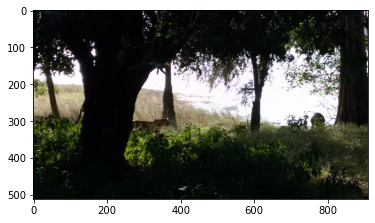

In [4]:
img_tiger = img.imread('Tiger.jpg')
# displaying the shape of the image
print(img_tiger.shape)
# displaying the modified image
plt.imshow(img_tiger)

### Convert image to hsv image

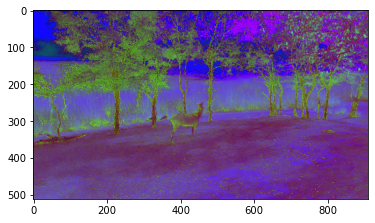

In [5]:
hsvImg1 = cv2.cvtColor(img_deer, cv2.COLOR_BGR2HSV)
plt.imshow(hsvImg1)

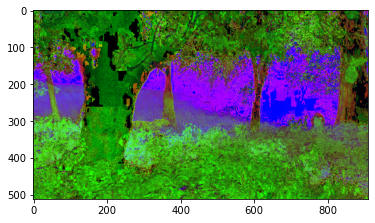

In [6]:
hsvImg2 = cv2.cvtColor(img_tiger, cv2.COLOR_BGR2HSV)
plt.imshow(hsvImg2)

## Maximally Saturated Image

In [7]:
def maxSat(img):
    # convert it to hsv
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    max_sat_img = hsv_img
    # making saturation value maximum
    max_sat_img[:,:,1] = 255
    # convert back to rgb image for displaying
    color_img = cv2.cvtColor(max_sat_img, cv2.COLOR_HSV2BGR)
    return color_img
    

In [8]:
deer_maxsat = maxSat(img_deer)

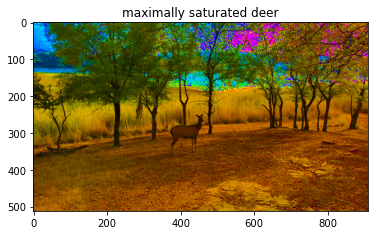

In [9]:
plt.title('maximally saturated deer')
plt.imshow(deer_maxsat)


In [10]:
tiger_maxsat = maxSat(img_tiger)

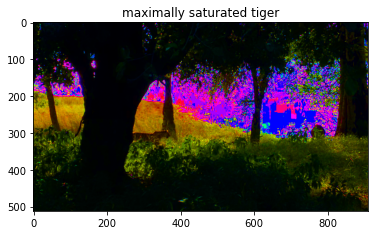

In [11]:
plt.title('maximally saturated tiger')
plt.imshow(tiger_maxsat)

## Desaturated Image 

In [12]:
def deSat(img, val):
    # convert it to hsv
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    max_sat_img = hsv_img
    # increase the value of saturation by some quantity
    if val> 255:
        print("Max pixel value is 255")
    max_sat_img[:,:,1] = max_sat_img[:,:,1] + val
    # convert back to bgr image for displaying
    de_sat_img = cv2.cvtColor(max_sat_img, cv2.COLOR_HSV2BGR)
    return de_sat_img

In [13]:
deer_desat = deSat(img_deer,30)

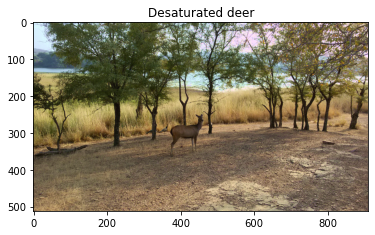

In [14]:
plt.title('Desaturated deer')

plt.imshow(deer_desat)

In [15]:
tiger_desat = deSat(img_tiger,30)

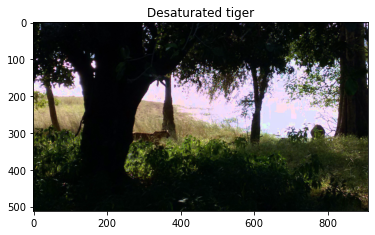

In [16]:
plt.title('Desaturated tiger')
plt.imshow(tiger_desat)

Enter the pixel value(value should be less than 255):44


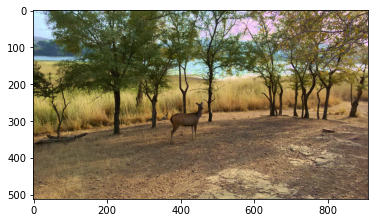

In [17]:
val = int(input("Enter the pixel value(value should be less than 255):"))
plt.imshow(deSat(img_deer,val))

In [18]:
# cv2.imshow('Desaturated Image', deSat(img,100))
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Enter the pixel value(value should be less than 255):44


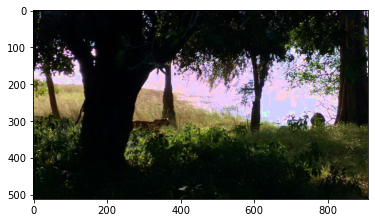

In [19]:
val = int(input("Enter the pixel value(value should be less than 255):"))
plt.imshow(deSat(img_tiger,val))

## Saturated Desaturated Image

In [20]:
def satdeSat(img, val1,val2):
    # convert it to hsv
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    max_sat_img = hsv_img
    # increase the value pf saturation by a quantity
    # decrease it by some other quantity
    max_sat_img[:,:,1] = max_sat_img[:,:,1] + val1 - val2
    max_sat_img = cv2.cvtColor(max_sat_img, cv2.COLOR_HSV2RGB)
    return max_sat_img

In [21]:
deer_satdesat = satdeSat(img_deer,90,20)

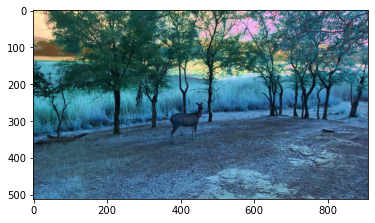

In [22]:
plt.imshow(deer_satdesat)

In [23]:
tiger_satdesat = satdeSat(img_tiger,90,20)

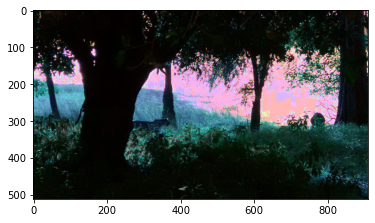

In [24]:
plt.imshow(tiger_satdesat)

Enter the  pixel value to increase:200
Enter the  pixel value to decrease:49


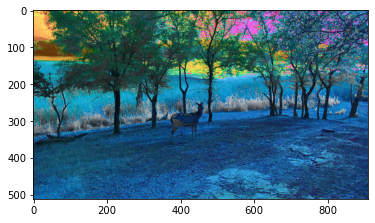

In [26]:
val1 = int(input("Enter the  pixel value to increase:"))
val2 = int(input("Enter the  pixel value to decrease:"))

plt.imshow(satdeSat(img_deer,val1,val2))

Enter the  pixel value to increase:233
Enter the  pixel value to decrease:45


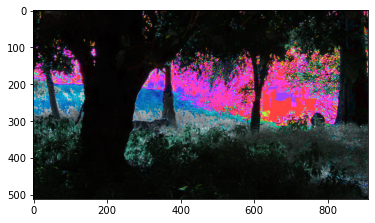

In [27]:
val3 = int(input("Enter the  pixel value to increase:"))
val4 = int(input("Enter the  pixel value to decrease:"))

plt.imshow(satdeSat(img_tiger,val3,val4))

# Showing chromaticity plots

### Reading data from csv file

In [28]:
# Give the location of the file
df = pd.read_csv("ciexyz31_1.csv")

df.head()

,360,0.000129900000,0.000003917000,0.000606100000
0,361,0.000146,0.000004,0.000681
1,362,0.000164,0.000005,0.000765
2,363,0.000184,0.000006,0.000860
3,364,0.000207,0.000006,0.000967
4,365,0.000232,0.000007,0.001086


In [29]:
df.columns = ['wavelength','x','y','z']
df_new = df[["x","y","z"]]
rgb_arr = df_new.to_numpy()

### Just displaying the CIE chromaticity graph . Though not asked in question

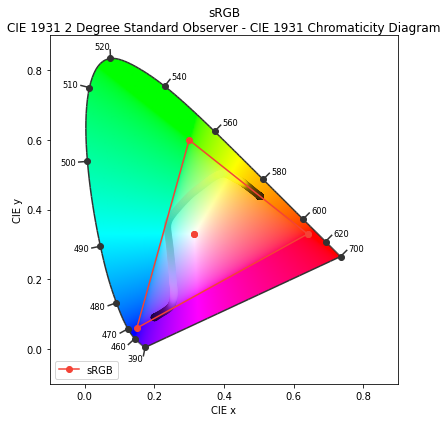

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'sRGB\nCIE 1931 2 Degree Standard Observer - CIE 1931 Chromaticity Diagram'}, xlabel='CIE x', ylabel='CIE y'>)

In [30]:
RGB = colour.models.eotf_inverse_sRGB(rgb_arr)

plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(RGB)


## Calculating xy values from xyz image

In [31]:
def get_xy():
    fp = open('ciexyz31_1.csv')
    rows = fp.readlines()
    X, Y, Z, xis, yis = [], [], [], [], []
    for row in rows:
        row = [float(i.strip()) for i in row.split(',')]
        X.append(row[1])
        Y.append(row[2])
        Z.append(row[3])
    for i in range(len(X)):
        xis.append(X[i] / (X[i] + Y[i] + Z[i]))
        yis.append(Y[i] / (X[i] + Y[i] + Z[i]))
    return xis,yis

In [32]:
def valueNormalize(img):
    x = list()
    y = list()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            a, b, c = int(img[i, j, 0]), int(img[i, j, 1]), int(img[i, j, 2])
            sum = float(a+b+c)
            if sum == 0:
                x.append(0)
                y.append(0)
            else:
                x.append(a / sum)
                y.append(b / sum)
    return x, y

In [33]:
xi, yi = get_xy()

In [34]:
deer_xyz = cv2.cvtColor(img_deer, cv2.COLOR_BGR2XYZ)
deer_xyz1 = cv2.cvtColor(deer_maxsat, cv2.COLOR_BGR2XYZ)
deer_xyz2 = cv2.cvtColor(deer_desat, cv2.COLOR_BGR2XYZ)
deer_xyz3 = cv2.cvtColor(deer_satdesat, cv2.COLOR_BGR2XYZ)

In [35]:
dx, dy = valueNormalize(deer_xyz)
dx1, dy1 = valueNormalize(deer_xyz1)
dx2, dy2 = valueNormalize(deer_xyz2)
dx3, dy3 = valueNormalize(deer_xyz3)

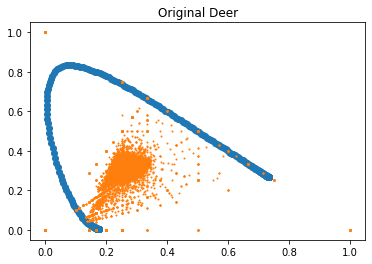

In [36]:
plt.scatter(xi, yi)
plt.scatter(dx, dy, s = 1)
plt.title('Original Deer')
plt.savefig('CIE_deer.jpg')
plt.show()


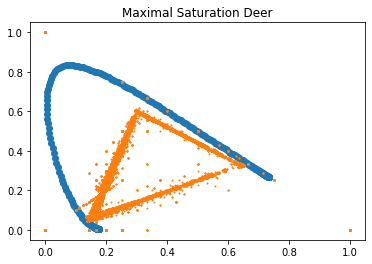

In [37]:
plt.scatter(xi, yi)
plt.scatter(dx1, dy1, s = 1)
plt.title('Maximal Saturation Deer')
plt.show()

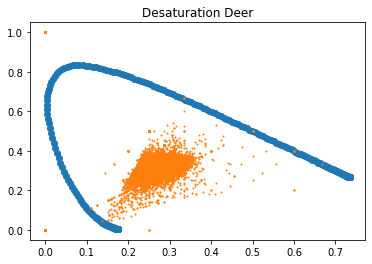

In [38]:
plt.scatter(xi, yi)
plt.scatter(dx2, dy2, s = 1)
plt.title('Desaturation Deer')
plt.show()

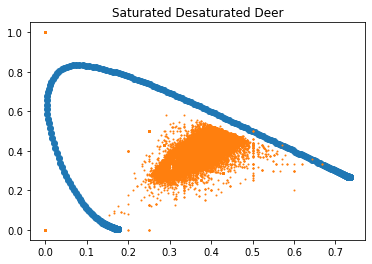

In [39]:
plt.scatter(xi, yi)
plt.scatter(dx3, dy3, s = 1)
plt.title('Saturated Desaturated Deer')
plt.show()

In [40]:
tiger_xyz = cv2.cvtColor(img_tiger, cv2.COLOR_BGR2XYZ)
tiger_xyz1 = cv2.cvtColor(tiger_maxsat, cv2.COLOR_BGR2XYZ)
tiger_xyz2 = cv2.cvtColor(tiger_desat, cv2.COLOR_BGR2XYZ)
tiger_xyz3 = cv2.cvtColor(tiger_satdesat, cv2.COLOR_BGR2XYZ)

In [41]:
tx, ty = valueNormalize(tiger_xyz)
tx1, ty1 = valueNormalize(tiger_xyz1)
tx2, ty2 = valueNormalize(tiger_xyz2)
tx3, ty3 = valueNormalize(tiger_xyz3)

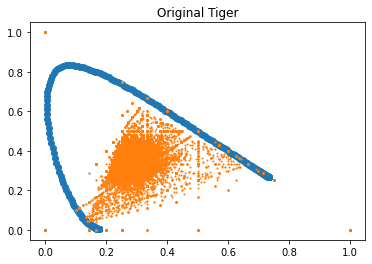

In [42]:
plt.scatter(xi, yi)
plt.scatter(tx, ty, s = 1)
plt.title('Original Tiger')
plt.show()

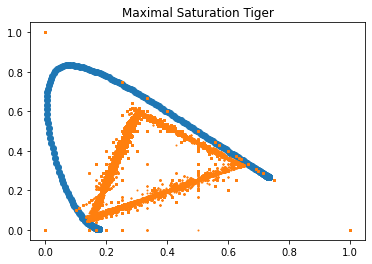

In [43]:
plt.scatter(xi, yi)
plt.scatter(tx1, ty1, s = 1)
plt.title('Maximal Saturation Tiger')
plt.show()

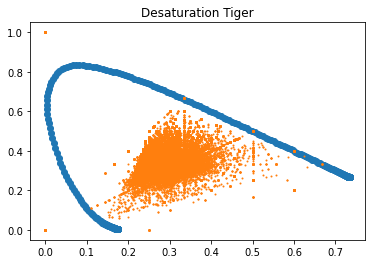

In [44]:
plt.scatter(xi, yi)
plt.scatter(tx2, ty2, s = 1)
plt.title('Desaturation Tiger')
plt.show()

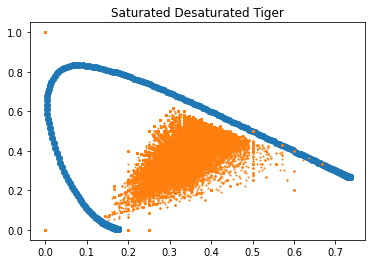

In [45]:
plt.scatter(xi, yi)
plt.scatter(tx3, ty3, s = 1)
plt.title('Saturated Desaturated Tiger')
plt.show()